# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately): **Chia Chi Ho (Michelle Ho)**

Enrollment Status (109A, 121A, 209A, or E109A): **209A**

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
%matplotlib inline

np.random.seed(12345)

import warnings
warnings.filterwarnings('ignore')

/Users/jasminetong/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/jasminetong/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


In [2]:
import json

In [3]:
# Load training data
with open("data/Bikeshare_train.json", "r") as fd:
    train_list = json.load(fd)

# Load test data
with open("data/Bikeshare_test.json", "r") as fd:
    test_list = json.load(fd)

In [4]:
# Convert train_list into dataframe
df_train = pd.DataFrame(train_list)
df_train.head()

,atemp,count,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,month_8.0,month_9.0,season_2.0,season_3.0,season_4.0,temp,weather_2.0,weather_3.0,windspeed,workingday
0,0.650106,6073.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.920664,...,0.0,0.0,1.0,0.0,0.0,0.623798,1.0,0.0,-0.928758,1.0
1,-0.054759,6606.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.696852,...,0.0,0.0,0.0,0.0,1.0,-0.180310,0.0,0.0,-0.213502,1.0
2,0.851495,7363.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.448383,...,0.0,0.0,1.0,0.0,0.0,0.802489,0.0,0.0,0.803926,1.0
3,-1.565182,2431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.332113,...,0.0,0.0,0.0,0.0,1.0,-1.520492,0.0,0.0,-0.269099,0.0
4,0.348021,1996.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.975789,...,0.0,1.0,0.0,1.0,0.0,0.534453,0.0,1.0,-1.199027,1.0


In [5]:
# Convert test_list into dataframe
df_test = pd.DataFrame(test_list)
df_test.head()

,atemp,count,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,month_8.0,month_9.0,season_2.0,season_3.0,season_4.0,temp,weather_2.0,weather_3.0,windspeed,workingday
0,-1.363792,3830.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.500703,...,0.0,0.0,0.0,0.0,0.0,-1.341801,0.0,0.0,0.040945,1.0
1,-1.665877,2114.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.132958,...,0.0,0.0,0.0,0.0,0.0,-1.431146,1.0,0.0,2.036025,1.0
2,1.757749,915.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.457103,...,0.0,0.0,1.0,0.0,0.0,1.695943,1.0,0.0,-0.523392,1.0
3,-0.759623,4322.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.997746,...,0.0,0.0,0.0,0.0,0.0,-0.805728,0.0,0.0,0.986696,1.0
4,0.952190,6591.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441062,...,0.0,0.0,1.0,0.0,0.0,0.981180,0.0,0.0,0.311061,0.0


## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [6]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)
    
    # Get predictors and reponses with the indices
    x_subset = x.iloc[subset_ind]
    y_subset = y.iloc[subset_ind]
    
    return (x_subset, y_subset)

- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

In [7]:
# predictors
all_predictors = list(df_train.columns)
all_predictors.remove('count') # remove count from predictor list because it is the response variable
print(all_predictors)

['atemp', 'day_of_week_1.0', 'day_of_week_2.0', 'day_of_week_3.0', 'day_of_week_4.0', 'day_of_week_5.0', 'day_of_week_6.0', 'holiday', 'humidity', 'month_10.0', 'month_11.0', 'month_12.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'season_2.0', 'season_3.0', 'season_4.0', 'temp', 'weather_2.0', 'weather_3.0', 'windspeed', 'workingday']


In [8]:
all_predictors[0], all_predictors[23]

('atemp', 'temp')

In [9]:
i_temp, i_atemp = 0, 23 # save index of temp and atemp

In [10]:
# feature matrix
X_train = df_train[all_predictors]
X_test = df_test[all_predictors]

# response vector
y_train = df_train['count']
y_test = df_test['count']

In [11]:
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]

# fit models -- linear regression, RidgeCV and LassoCV
linear_model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
ridge_model = RidgeCV(alphas=lambdas, fit_intercept=True).fit(X_train, y_train)
lasso_model = LassoCV(alphas=lambdas, fit_intercept=True).fit(X_train, y_train)

# print fitted coefficients
print('Plain linear regression model:\n {} + {}^T . x'.format(linear_model.intercept_, linear_model.coef_))
print("---------------------------")
print('Ridge regression model:\n {} + {}^T . x'.format(ridge_model.intercept_, ridge_model.coef_))
print("Ridge regression optimal alpha: {}".format(ridge_model.alpha_))
print("---------------------------")
print("Lasso regression model:\n {} + {}^T . x".format(lasso_model.intercept_, lasso_model.coef_))
print("Lasso regression optimal alpha: {}".format(lasso_model.alpha_))
print("---------------------------")
print("# coefs shrunk by Ridge = {}".format(sum(abs(linear_model.coef_) > abs(ridge_model.coef_))))
print("# coefs shrunk by Lasso = {}".format(sum(abs(linear_model.coef_) > abs(lasso_model.coef_))))
print("---------------------------")
print("# coefs close to 0 by Ridge = {}".format(sum(abs(ridge_model.coef_) < 1e-10)))
print("# coefs close to 0 by Lasso = {}".format(sum(abs(lasso_model.coef_) < 1e-10)))
print("---------------------------")
print('\ncoefficients for \'temp\' and \'atemp\':')
print('linear:', linear_model.coef_[i_temp], linear_model.coef_[i_atemp])
print('ridge:', ridge_model.coef_[i_temp], ridge_model.coef_[i_atemp])
print('lasso:', lasso_model.coef_[i_temp], lasso_model.coef_[i_atemp])

Plain linear regression model:
 3681.776531517351 + [  312.43407189  -123.75147639  -195.28593262   170.51134687    61.25602987
   111.06689939   465.14500996  -284.35627461  -548.49294906   486.25090367
   112.68164522  -118.83581872    88.94009267   239.18089841   333.34908642
   -65.81249999  -792.2628985  -1279.98700626  -776.4754899    405.1445661
   898.82903949  1032.88157484  1226.18654265   925.73384986   -16.56658402
 -1581.97828361  -255.12258899   308.15314174]^T . x
---------------------------
Ridge regression model:
 4001.4160435187196 + [ 553.88994683 -130.58113365 -125.49534264  124.31796857   64.47904074
  126.17310553  303.9886922  -158.55971554 -567.72191933  503.42304275
  159.09586506 -100.6582173  -115.1218662    88.89050681  369.53564813
  133.37245386 -312.37487384 -529.54451686  -89.29404068  676.88686869
  393.17255806  172.1792805   761.78543763  682.80825822   20.28051056
 -676.14388831 -266.41311936  217.45335409]^T . x
Ridge regression optimal alpha: 10.0


In [12]:
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
sample_sizes = [100, 150, 200, 250, 300, 350, 400]
num_trials = 10

# initialize empty matrices for r2 values of i-th trial and j-th sample size
r2_train_linear = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))
r2_train_ridge = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))
r2_train_lasso = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))

r2_test_linear = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))
r2_test_ridge = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))
r2_test_lasso = np.nan * np.ones(shape=(num_trials,len(sample_sizes)))

for i in range(num_trials):
    for j, size in enumerate(sample_sizes):

        X_train_sample, y_train_sample = sample(X_train, y_train, size)
        
        linear_model = LinearRegression(fit_intercept=True).fit(X_train_sample, y_train_sample)
        ridge_model = RidgeCV(alphas=lambdas, fit_intercept=True).fit(X_train_sample, y_train_sample)
        lasso_model = LassoCV(alphas=lambdas, fit_intercept=True).fit(X_train_sample, y_train_sample)

        # calculate R^2 for subset of training sample
        r2_train_linear[i][j] = linear_model.score(X_train_sample, y_train_sample)
        r2_train_ridge[i][j] = ridge_model.score(X_train_sample, y_train_sample)
        r2_train_lasso[i][j] = lasso_model.score(X_train_sample, y_train_sample)

        # calculate R^2 for test set
        r2_test_linear[i][j] = linear_model.score(X_test, y_test)
        r2_test_ridge[i][j] = ridge_model.score(X_test, y_test)
        r2_test_lasso[i][j] = lasso_model.score(X_test, y_test)


In [13]:
# calculate mean R^2 for each sample size across 10 trials
r2_train_linear_mean = r2_train_linear.mean(axis=0)
r2_train_ridge_mean = r2_train_ridge.mean(axis=0)
r2_train_lasso_mean = r2_train_lasso.mean(axis=0)

r2_test_linear_mean = r2_test_linear.mean(axis=0)
r2_test_ridge_mean = r2_test_ridge.mean(axis=0)
r2_test_lasso_mean = r2_test_lasso.mean(axis=0)

# calculate standard dev R^2 for each sample size across 10 trials
r2_train_linear_sd = r2_train_linear.std(axis=0)
r2_train_ridge_sd = r2_train_ridge.std(axis=0)
r2_train_lasso_sd = r2_train_lasso.std(axis=0)

r2_test_linear_sd = r2_test_linear.std(axis=0)
r2_test_ridge_sd = r2_test_ridge.std(axis=0)
r2_test_lasso_sd = r2_test_lasso.std(axis=0)

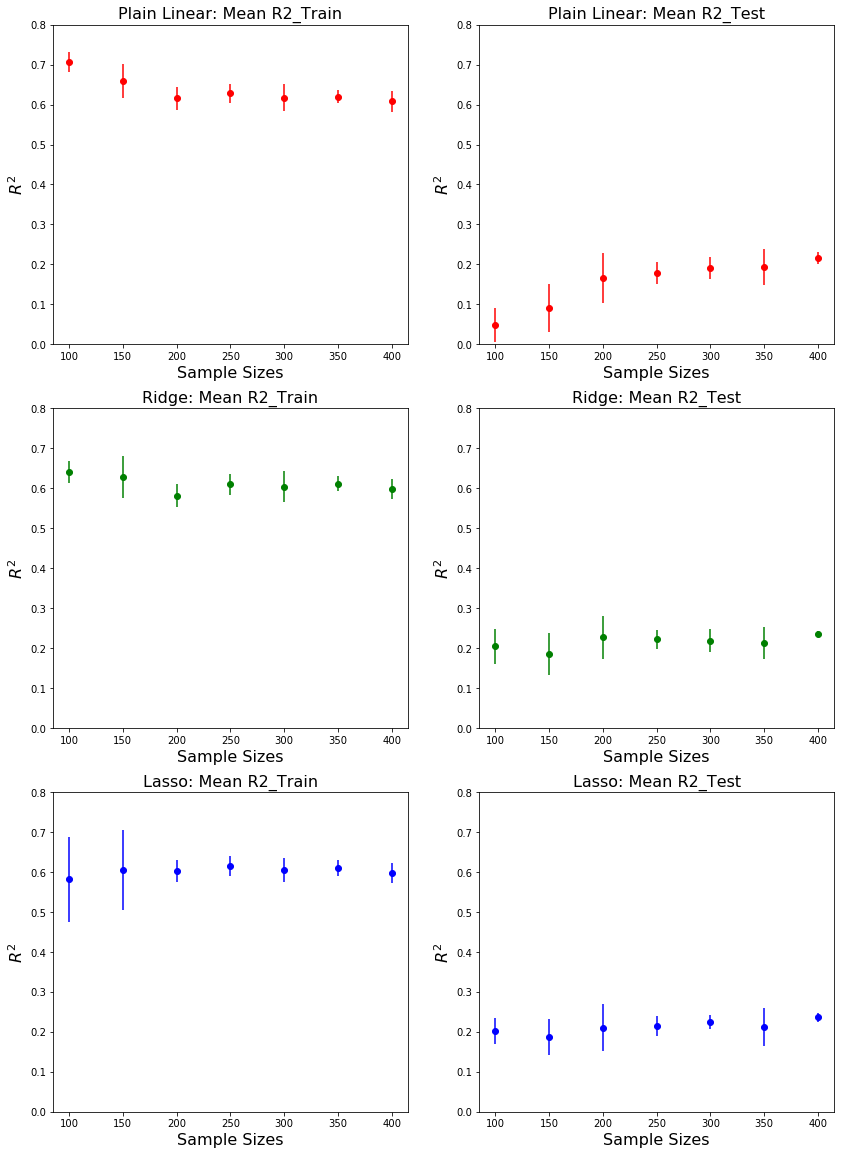

In [14]:
fig1, axarr1 = plt.subplots(3, 2, figsize=(14, 20))

axarr1[0,0].errorbar(sample_sizes, r2_train_linear_mean, yerr = r2_train_linear_sd, color='r', fmt='o')
axarr1[0,0].set_title('Plain Linear: Mean R2_Train', fontsize=16)
axarr1[0,1].errorbar(sample_sizes, r2_test_linear_mean, yerr = r2_test_linear_sd, color='r', fmt='o')
axarr1[0,1].set_title('Plain Linear: Mean R2_Test', fontsize=16)


axarr1[1,0].errorbar(sample_sizes, r2_train_ridge_mean, yerr = r2_train_ridge_sd, color='g', fmt='o')
axarr1[1,0].set_title('Ridge: Mean R2_Train', fontsize=16)
axarr1[1,1].errorbar(sample_sizes, r2_test_ridge_mean, yerr = r2_test_ridge_sd, color='g', fmt='o')
axarr1[1,1].set_title('Ridge: Mean R2_Test', fontsize=16)

axarr1[2,0].errorbar(sample_sizes, r2_train_lasso_mean, yerr = r2_train_lasso_sd, color='b', fmt='o')
axarr1[2,0].set_title('Lasso: Mean R2_Train', fontsize=16)
axarr1[2,1].errorbar(sample_sizes, r2_test_lasso_mean, yerr = r2_test_lasso_sd, color='b', fmt='o')
axarr1[2,1].set_title('Lasso: Mean R2_Test', fontsize=16)

for i in range(3):
    for j in range(2):
        axarr1[i,j].set_xlabel('Sample Sizes', fontsize=16)
        axarr1[i,j].set_ylim(0, 0.8)
        axarr1[i,j].set_ylabel('$R^2$', fontsize=16)


## Answers

### Part 1
How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? 
> ** As per the printed coefficients from the 3 models (plain linear, ridge, and lasso) above, ridge and lasso shrank the magnitude of a subset of coefficients compared to the plain linear model. Specifically, ridge shrunk 15 predictors while lasso shrunk 24 predictors. Lasso, furthermore, reduced the coefficients of 7 predictors to 0, effictively selecting against them.  **

Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference. 
> **There is a difference between coefficients estimated by the 2 shrinkage methods. Lasso shrinks some coefficients to zero while ridge does not. This is because ridge uses 2-norm to penalize $\beta$s to be $\frac{\beta}{\lambda + 1}$ (never 0) while lasso uses 1-norm to penalize $\beta$s to be $sign(\beta)[|\beta|-\lambda]^+$ (can be 0).**


List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3? 
> ** The Ridge model did not shrink any of the coefficients close to 0. On the other hand, the Lasso model shrunk 'day_of_week_4.0', 'holiday', 'month_12.0', 'month_2.0', 'month_5.0', 'month_8.0', 'weather_2.0' to 0. This list of predictors is a subset of the redundant predictors identified in Part (c) from HW 3. As we stated in HW 3, day_or_week, month and weather all fall into natural groups because they are correlated information. Also, holiday is likely redundant with workingday as well.**

Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors temp and atemp? If so, explain the reason for the difference. 
> ** Yes, there is a difference. As $\lambda$ grows, both Lasso and Ridge reduce the difference between temp and atemp coefficients, but Ridge reduces the difference faster (at $\lambda=10$, temp: 553.89, atemp: 682.81) than Lasso did (at $\lambda=10$, temp: 405.67, atemp: 847.72). This difference could be explained by visualizing the 2-norm and 1-norm. The 2-norm constraint in Ridge corresponds to a disc, so the Ridge solution for $\beta$s occur when the contours of residual sum of squares touches the disc. Because of this geometry, there is a certain "smoothness" and "continuousness" to Ridge solutions. One of the resulting properties is that Ridge never shrinks any coefficients to zero. Another is that it is more effective at reducing the difference in coefficients for predictor pairs like temp and atemp. On the other hand, the 1-norm constraint in Lasso corresponds to a diamond, and the Lasso solution for $\beta$s occur when the contours of residual sum of squares touches the diamond. Because of this "edgy" geometry, Lasso solutions are more "all-or-nothing". A resulting property is that Lasso can shrink coefficients to zero. Another is that it is less effective at reducing the difference in coefficients for predictor pairs like temp and atemp. **

### Part 2
How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. 
> ** The training $R^2$ for the 3 methods are similar while lasso and ridge perform slightly better than the plain linear regression on the test set $R^2$ **

How do the confidence intervals for the estimated  $R^2$ change with training sample size? 
> ** The confidence intervals shrink for the estimated $R^2$ as the training sample size increases. **

Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample? 
> ** We would recommend the Ridge model when one needs to fit a regression model using a small training sample because**  
   - **it outperforms the other tests at small sample sizes (i.e. higher $R^2$ on test compared to the other 2 models at small sample sizes) **
   - **and is more stable (i.e. smaller confidence interval of $R^2$ on train compared to the other 2 models at small sample sizes). **

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

** For parts (g) and onwards, we modify the df_train and df_test dataframes by adding back weather_1.0, dropping weather_2.0**

In [15]:
# recreate weather = 1.0 dummy column 
df_train['weather_1.0'] = 1-df_train['weather_2.0']-df_train['weather_3.0']
df_test['weather_1.0'] = 1-df_test['weather_2.0']-df_test['weather_3.0']

# set weather_2.0 to the reference level by deleting it
df_train.drop(['weather_2.0'], axis=1, inplace=True)
df_test.drop(['weather_2.0'], axis=1, inplace=True)

In [16]:
df_train.head()

,atemp,count,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,month_8.0,month_9.0,season_2.0,season_3.0,season_4.0,temp,weather_3.0,windspeed,workingday,weather_1.0
0,0.650106,6073.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.920664,...,0.0,0.0,1.0,0.0,0.0,0.623798,0.0,-0.928758,1.0,0.0
1,-0.054759,6606.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.696852,...,0.0,0.0,0.0,0.0,1.0,-0.180310,0.0,-0.213502,1.0,1.0
2,0.851495,7363.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.448383,...,0.0,0.0,1.0,0.0,0.0,0.802489,0.0,0.803926,1.0,1.0
3,-1.565182,2431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.332113,...,0.0,0.0,0.0,0.0,1.0,-1.520492,0.0,-0.269099,0.0,1.0
4,0.348021,1996.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.975789,...,0.0,1.0,0.0,1.0,0.0,0.534453,1.0,-1.199027,1.0,0.0


In [17]:
# re-fit multiple regression with all predictors for comparison
all_predictors = list(df_train.columns)
all_predictors.remove('count')

# feature matrix
X_train = df_train[all_predictors]
X_test = df_test[all_predictors]
X_train_ones = add_constant(X_train)
X_test_ones = add_constant(X_test)

# response vector
y_train = df_train['count']
y_test = df_test['count']

linear_all = sm.OLS(y_train, X_train_ones).fit()

# predict with regression model
y_hat_train = linear_all.predict(X_train_ones)
y_hat_test = linear_all.predict(X_test_ones)

# model performance
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

p_vals = linear_all.pvalues
print("Linear regression from HW 3 Part (b):")
print('R-squared for the train set is: %f' %r2_train)
print('R-squared for the test set is: %f' %r2_test)
# print("The coefficients are: \n", linear_all.params)
# print('--------------------------')
# print('significant p-values: \n', p_vals[p_vals<0.05])

Linear regression from HW 3 Part (b):
R-squared for the train set is: 0.576128
R-squared for the test set is: 0.249342


In [18]:
# FOR TRAINING DATA
# make polynomial features and append them to df_train_poly
deg = 4
df_poly_terms_train = pd.DataFrame()
df_poly_terms_train[['temp^2', 'temp^3', 'temp^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_train['temp'].values.reshape(-1,1))[:, 2:5], index=df_train.index)
df_poly_terms_train[['atemp^2', 'atemp^3', 'atemp^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_train['atemp'].values.reshape(-1,1))[:, 2:5], index=df_train.index)
df_poly_terms_train[['windspeed^2', 'windspeed^3', 'windspeed^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_train['windspeed'].values.reshape(-1,1))[:, 2:5], index=df_train.index)
df_poly_terms_train[['humidity^2', 'humidity^3', 'humidity^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_train['humidity'].values.reshape(-1,1))[:, 2:5], index=df_train.index)

# concatenate df_train with the new polynomial terms in df_train_poly
df_train_poly = pd.concat([df_train, df_poly_terms_train], axis=1)
df_train_poly.head()

,atemp,count,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,temp^4,atemp^2,atemp^3,atemp^4,windspeed^2,windspeed^3,windspeed^4,humidity^2,humidity^3,humidity^4
0,0.650106,6073.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.920664,...,0.151418,0.422637,0.274759,0.178622,0.862591,-0.801139,0.744064,0.847622,0.780375,0.718464
1,-0.054759,6606.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.696852,...,0.001057,0.002998,-0.000164,0.000009,0.045583,-0.009732,0.002078,0.485603,0.338393,0.235810
2,0.851495,7363.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.448383,...,0.414722,0.725044,0.617372,0.525689,0.646297,0.519575,0.417699,0.201047,-0.090146,0.040420
3,-1.565182,2431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.332113,...,5.344859,2.449794,-3.834373,6.001490,0.072414,-0.019487,0.005244,0.110299,-0.036632,0.012166
4,0.348021,1996.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.975789,...,0.081590,0.121119,0.042152,0.014670,1.437666,-1.723801,2.066885,3.903744,7.712976,15.239217


In [19]:
# FOR TEST DATA
# make polynomial features and append them to df_test_poly
df_poly_terms_test = pd.DataFrame()
df_poly_terms_test[['temp^2', 'temp^3', 'temp^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_test['temp'].values.reshape(-1,1))[:, 2:5], index=df_test.index)
df_poly_terms_test[['atemp^2', 'atemp^3', 'atemp^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_test['atemp'].values.reshape(-1,1))[:, 2:5], index=df_test.index)
df_poly_terms_test[['windspeed^2', 'windspeed^3', 'windspeed^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_test['windspeed'].values.reshape(-1,1))[:, 2:5], index=df_test.index)
df_poly_terms_test[['humidity^2', 'humidity^3', 'humidity^4']] = pd.DataFrame(PolynomialFeatures(deg).fit_transform(df_test['humidity'].values.reshape(-1,1))[:, 2:5], index=df_test.index)

# concatenate df_test with the new polynomial terms in df_tet_poly
df_test_poly = pd.concat([df_test, df_poly_terms_test], axis=1)
df_test_poly.head()

,atemp,count,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,temp^4,atemp^2,atemp^3,atemp^4,windspeed^2,windspeed^3,windspeed^4,humidity^2,humidity^3,humidity^4
0,-1.363792,3830.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.500703,...,3.241547,1.859929,-2.536556,3.459334,0.001676,0.000069,0.000003,0.250704,-0.125528,0.062852
1,-1.665877,2114.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.132958,...,4.195040,2.775145,-4.623049,7.701430,4.145397,8.440130,17.184314,0.017678,0.002350,0.000313
2,1.757749,915.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.457103,...,8.272666,3.089683,5.430888,9.546139,0.273940,-0.143378,0.075043,0.208943,-0.095509,0.043657
3,-0.759623,4322.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.997746,...,0.421458,0.577027,-0.438323,0.332960,0.973568,0.960616,0.947835,0.995497,-0.993253,0.991014
4,0.952190,6591.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441062,...,0.926819,0.906666,0.863319,0.822044,0.096759,0.030098,0.009362,0.194535,0.085802,0.037844


In [20]:
predictors_poly = list(df_train_poly.columns)
predictors_poly.remove('count')

In [21]:
# FIT AND EVALUATE MODEL WITH POLYNOMIAL TERMS
# select feature matrix
X_train_poly = df_train_poly[predictors_poly]
X_test_poly = df_test_poly[predictors_poly]
X_train_poly_ones = add_constant(X_train_poly)
X_test_poly_ones = add_constant(X_test_poly)

# fit multiple regression model on the expanded training set
linear_poly = sm.OLS(y_train, X_train_poly_ones).fit()

# predict with regression model
y_hat_train_poly = linear_poly.predict(X_train_poly_ones)
y_hat_test_poly = linear_poly.predict(X_test_poly_ones)

# model performance
r2_train_poly = r2_score(y_train, y_hat_train_poly)
r2_test_poly = r2_score(y_test, y_hat_test_poly)

p_vals_poly = linear_poly.pvalues

print("Polynomial regression: ")
print('R-squared for the train set is: %f' %r2_train_poly)
print('R-squared for the test set is: %f' %r2_test_poly)
# print('The coefficients are: \n', linear_poly.params)
print('--------------------------')
print('significant p-values: \n', p_vals_poly[p_vals_poly<0.05])

Polynomial regression: 
R-squared for the train set is: 0.669656
R-squared for the test set is: 0.277238
--------------------------
significant p-values: 
 const          1.887572e-22
humidity       2.870343e-05
month_6.0      3.769801e-02
month_8.0      2.165939e-02
season_3.0     2.582724e-03
season_4.0     1.256241e-03
weather_3.0    2.785951e-02
windspeed      2.950904e-03
workingday     2.036885e-02
temp^2         2.740200e-02
dtype: float64


In [22]:
# FOR TRAINING DATA
# generate interaction terms for the training data
from copy import deepcopy
gen_cross_terms = PolynomialFeatures(interaction_only=True) # function to generate interaction terms

# dataframe with the polynomials and 2 additional interaction terms
df_train_int = deepcopy(df_train_poly) # this way we are not changing df_train_poly

# create interaction term between 'temp' and 'month_12.0'
df_train_int['tempXmonth_12'] = gen_cross_terms.fit_transform(df_train_int[['temp', 'month_12.0']])[:,-1].reshape(-1,1)

# create interaction term between 'workingday' and 'weather_1.0'
df_train_int['workXweather_1'] = gen_cross_terms.fit_transform(df_train_int[['workingday', 'weather_1.0']])[:,-1].reshape(-1,1)

In [23]:
# FOR TEST DATA
# generate interaction terms for the test data
df_test_int = deepcopy(df_test_poly) 

# create interaction term between 'temp' and 'month_12.0'
df_test_int['tempXmonth_12'] = gen_cross_terms.fit_transform(df_test_int[['temp', 'month_12.0']])[:,-1].reshape(-1,1)

# create interaction term between 'workingday' and 'weather_1.0'
df_test_int['workXweather_1'] = gen_cross_terms.fit_transform(df_test_int[['workingday', 'weather_1.0']])[:,-1].reshape(-1,1)


In [24]:
# get predictors 
predictors_int = list(df_train_int.columns)
predictors_int.remove('count')

In [25]:
# FIT AND EVALUATE MODEL ON INTERACTION/POLYNOMIAL TERMS
# select feature matrix
X_train_int = df_train_int[predictors_int]
X_test_int = df_test_int[predictors_int]
X_train_int_ones = add_constant(X_train_int)
X_test_int_ones = add_constant(X_test_int)

# fit multiple regression model on the expanded training set
linear_int = sm.OLS(y_train, X_train_int_ones).fit()

# predict with regression model
y_hat_train_int = linear_int.predict(X_train_int_ones)
y_hat_test_int = linear_int.predict(X_test_int_ones)

# model performance
r2_train_int = r2_score(y_train, y_hat_train_int)
r2_test_int = r2_score(y_test, y_hat_test_int)

p_vals_int = linear_int.pvalues
print("Polynomial + Interaction regression: ")
print('R-squared for the train set is: %f' %r2_train_int)
print('R-squared for the test set is: %f' %r2_test_int)
# print('The coefficients are: \n', linear_int.params)
print('--------------------------')
print('significant p-values: \n', p_vals_int[p_vals_int<0.05])

Polynomial + Interaction regression: 
R-squared for the train set is: 0.669968
R-squared for the test set is: 0.282978
--------------------------
significant p-values: 
 const          2.215363e-19
humidity       2.687093e-05
month_6.0      4.673872e-02
month_8.0      3.057212e-02
season_3.0     4.405070e-03
season_4.0     3.387359e-03
weather_3.0    2.852628e-02
windspeed      3.156613e-03
temp^2         2.876055e-02
dtype: float64


## Answer

### Part 1 -- polynomial expansion
How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? 
> ** The polynomial expanded model has an improved test $R^2$ of 0.277238 compared to the linear model in Part (b) from HW 3 with a test $R^2$ of 0.249342. **

Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 
> ** As the p-values shown above, out of all the polynomial terms, only temp^2 is statistically significant at a significance level of 5%. **

### Part 2 -- polynomial + interaction expansion
How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? 
> ** The polynomial + interaction expanded model has an improved test $R^2$ of 0.282978 compared to the linear model in part (b) from HW 3 with a test $R^2$ of 0.249342. **

Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%? 
> ** None of the interaction terms are statistically significant at a significance level of 5%. **

## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

In [26]:
# FOR TRAINING DATA
# make a new dataframe with all cross terms and polynomials
df_train_features = df_train_poly.drop('count', axis=1)
cross_terms_train = gen_cross_terms.fit_transform(df_train_features) # generate cross terms from original df_train
feature_names = gen_cross_terms.get_feature_names(df_train_features.columns) # get feature names for all cross terms

X_train_comb = pd.DataFrame(cross_terms_train, columns = feature_names)

# FOR TEST DATA
# make a new dataframe with all cross terms and polynomials
df_test_features = df_test_poly.drop('count', axis=1)
cross_terms_test = gen_cross_terms.fit_transform(df_test_features) # generate cross terms from original df_test

X_test_comb = pd.DataFrame(cross_terms_test, columns = feature_names)

# # DROP COLUMNS FOR WHICH BOTH TRAIN AND TEST DATA ARE ALL 0
# X_train_0 = [] # column names in train that has all 0
# X_test_0 = [] # columns name in test that has all 0

# for col in X_train_comb.columns: # 
#     if (all(X_train_comb[col] == 0)):
#         X_train_0.append(col)

# for col in X_test_comb.columns:
#     if(all(X_test_comb[col] == 0)):
#         X_test_0.append(col)

# to_drop = list(set(X_train_0).intersection(X_test_0)) # the intersecting list of columns that have all 0

# X_train_comb.drop(to_drop, axis=1, inplace=True) # drop columns in df_train_comb
# X_test_comb.drop(to_drop, axis=1, inplace=True) # drop columns in df_test_comb

In [27]:
# all the cross terms that would generate higher degree polynomials
feature_to_drop = [
    "temp temp^2", "temp temp^3", "temp temp^4", "temp^2 temp^3", "temp^2 temp^4", "temp^3 temp^4",
    "atemp atemp^2", "atemp atemp^3", "atemp atemp^4", "atemp^2 atemp^3", "atemp^2 atemp^4", "atemp^3 atemp^4",
    "windspeed windspeed^2", "windspeed windspeed^3", "windspeed windspeed^4", "windspeed^2 windspeed^3", "windspeed^2 windspeed^4", "windspeed^3 windspeed^4",
    "humidity humidity^2", "humidity humidity^3", "humidity humidity^4", "humidity^2 humidity^3", "humidity^2 humidity^4","humidity^3 humidity^4" 
]

# drop these columns from the feature dataframes
X_train_comb.drop(feature_to_drop, axis=1, inplace=True)
X_test_comb.drop(feature_to_drop, axis=1, inplace=True)

In [28]:
# Normalize the continuous predictors
# FOR TRAINING DATA
for p in X_train_comb.columns:
    # check if it is a continuouse variable
    if (not np.logical_or((X_train_comb[p]==0), ((X_train_comb[p]==1))).all()):
        X_train_comb[p] = (X_train_comb[p] - X_train_comb[p].mean())/X_train_comb[p].std()
X_train_comb.head()
print(X_train_comb.shape)
X_train_comb.head()

(331, 797)


,1,atemp,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,atemp^4 humidity^4,windspeed^2 humidity^2,windspeed^2 humidity^3,windspeed^2 humidity^4,windspeed^3 humidity^2,windspeed^3 humidity^3,windspeed^3 humidity^4,windspeed^4 humidity^2,windspeed^4 humidity^3,windspeed^4 humidity^4
0,1.0,0.650106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.920664,...,-0.207038,-0.170229,0.142066,-0.248270,-0.259034,0.085403,-0.185767,-0.194377,0.101868,-0.192337
1,1.0,-0.054759,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.696852,...,-0.212615,-0.378486,0.041328,-0.299328,-0.180067,0.127194,-0.164285,-0.222777,0.086796,-0.200401
2,1.0,0.851495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.448383,...,-0.211692,-0.346822,0.030042,-0.298039,-0.167281,0.124268,-0.163412,-0.219035,0.085799,-0.200153
3,1.0,-1.565182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.332113,...,-0.209442,-0.382641,0.038559,-0.300155,-0.179765,0.127463,-0.164208,-0.222797,0.086772,-0.200407
4,1.0,0.348021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.975789,...,-0.202900,1.263490,1.737344,1.536606,-0.967531,-0.766039,-1.148528,0.141097,0.501086,0.275149


In [29]:
# FOR TEST DATA
for p in X_test_comb.columns:
    # check if it is a continuouse variable
    if (not np.logical_or((X_test_comb[p]==0), ((X_test_comb[p]==1))).all()):
        X_test_comb[p] = (X_test_comb[p] - X_test_comb[p].mean())/X_test_comb[p].std()
print(X_test_comb.shape)
X_test_comb.head()

(400, 797)


,1,atemp,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,holiday,humidity,...,atemp^4 humidity^4,windspeed^2 humidity^2,windspeed^2 humidity^3,windspeed^2 humidity^4,windspeed^3 humidity^2,windspeed^3 humidity^3,windspeed^3 humidity^4,windspeed^4 humidity^2,windspeed^4 humidity^3,windspeed^4 humidity^4
0,1.0,-1.170934,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.429753,...,-0.256044,-0.169365,0.068132,-0.086415,-0.079386,0.063810,-0.060409,-0.073679,0.054924,-0.056076
1,1.0,-1.455602,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.211487,...,-0.266987,-0.160571,0.068525,-0.086400,-0.074796,0.064008,-0.060400,-0.071347,0.055023,-0.056071
2,1.0,1.770634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.385631,...,-0.245900,-0.162508,0.067105,-0.086264,-0.080308,0.063947,-0.060429,-0.073559,0.054906,-0.056073
3,1.0,-0.601598,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.932739,...,-0.250317,-0.052437,0.029890,-0.074130,-0.049969,0.054286,-0.057347,-0.066435,0.052594,-0.055328
4,1.0,1.011520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523275,...,-0.265526,-0.167144,0.068468,-0.086369,-0.079206,0.063836,-0.060405,-0.073665,0.054926,-0.056075


In [30]:
# PCA regression with 1-5 components
num_models = 5
r2_train_comb_pca = []
r2_test_comb_pca = []
pca_coefs = []

for i in range(num_models):
    pca = PCA(n_components=i+1)
    pca.fit(X_train_comb)
    X_train_comb_pca = pca.transform(X_train_comb)
    X_test_comb_pca = pca.transform(X_test_comb)

    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_comb_pca, y_train)
    
    pca_coefs.append(regression_model.coef_)
    
    r2_train_comb_pca.append(regression_model.score(X_train_comb_pca, y_train))
    r2_test_comb_pca.append(regression_model.score(X_test_comb_pca, y_test))

In [31]:
print("The coefficients are:")
for i in range(num_models):
    print("PCA component = {}, Coefficients = {}".format(i+1, pca_coefs[i]))

The coefficients are:
PCA component = 1, Coefficients = [-96.2496588]
PCA component = 2, Coefficients = [-96.24967128  95.98843636]
PCA component = 3, Coefficients = [-96.24964961  95.98605753 -33.82997384]
PCA component = 4, Coefficients = [-96.24966826  95.98827135 -33.83513963  36.45669366]
PCA component = 5, Coefficients = [-96.24964942  95.98114604 -33.83530282  36.51258452 -99.11723087]


In [32]:
print("For training data with: ")
for i in range(num_models):
    print("PCA component = {}, R^2 = {}".format(i+1, r2_train_comb_pca[i]))
print("-------------------")
print("For test data with: ")
for i in range(num_models):
    print("PCA component = {}, R^2 = {}".format(i+1, r2_test_comb_pca[i]))

For training data with: 
PCA component = 1, R^2 = 0.14803795895785588
PCA component = 2, R^2 = 0.21855485231417204
PCA component = 3, R^2 = 0.22696598327942086
PCA component = 4, R^2 = 0.23464857445256193
PCA component = 5, R^2 = 0.28165908007621465
-------------------
For test data with: 
PCA component = 1, R^2 = 0.13075792245005713
PCA component = 2, R^2 = 0.15569445573814422
PCA component = 3, R^2 = 0.16673072420772816
PCA component = 4, R^2 = 0.16298735630258462
PCA component = 5, R^2 = 0.20579422934769842


## Answer

What are the dimensions of this 'design matrix' of all the predictor variables? 
> ** 331 x 797 design matrix: 797 = 1 (const ones) + $C_{40}^2$ (interacting terms) + 28 (main effects) + 4x3 (polynomial of continuous predictors) - 4x$C_4^2$ (interacting terms duplicate with polynomial terms).**

What are the issues with attempting to fit a regression model using all of these predictors? 
> ** Linear least square fitting fails when number of observations (331) is smaller than number of predictors (797). Mathematically, the normal equation has infinitely many solutions for the $\beta$s since this matrix is rank deficient: #row (observations) < #col (preditors). Thus, we cannot find the unique set of $\beta$s. **

Briefly summarize how these models compare in the training set. 
> ** The training $R^2$ improves as the number of PCA components increases. **

Use the test set to decide which of the 5 models above is best to predict out of sample. 
> ** The model with the best test $R^2$ is the model with 5 PCA components. This model has a test $R^2$ of 0.206. **

How does this model compare to the previous models you've fit? 
> ** The PCA model performed the worst compared to all previous models we've fit as it has the lowest test $R^2$ value. **

What are the interpretations of this model's coefficients?
> **PCA captures the variability/variance in the predictors (X's). Using PCA as features to fit the response variable, the resulting coefficients would represent the unit change in response per unit change in some variability measure of X. For instance, the first coefficient in our model is -96.25, we would interpret that as the component which explains most variance in X negatively correlates with bike rental. **

## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [33]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

In [34]:
# compute the training and test RMSLE for polynomial regression model
rmsle_train_poly = rmsle(y_train, y_hat_train_poly)
rmsle_test_poly = rmsle(y_test, y_hat_test_poly)

print("RMSLE for polynomial regression in part (g):")
print("Training RMSLE = {}".format(rmsle_train_poly))
print("Test RMSLE = {}".format(rmsle_test_poly))

RMSLE for polynomial regression in part (g):
Training RMSLE = 0.3106448773475634
Test RMSLE = 0.524272332738139


In [35]:
# perform transformation on response variable - z = log(y+1)
z_train = np.log(y_train+1)

# fit polynomial regression using polynomial features and transformed response
linear_poly_z = sm.OLS(z_train, X_train_poly_ones).fit()

# predict with regression model
z_hat_train_poly_z = linear_poly_z.predict(X_train_poly_ones)
z_hat_test_poly_z = linear_poly_z.predict(X_test_poly_ones)

# undo transformation
y_hat_train_poly_z = np.exp(z_hat_train_poly_z) - 1
y_hat_test_poly_z = np.exp(z_hat_test_poly_z) - 1

# calculate training RMSLE
rmsle_train_poly_z = rmsle(y_train, y_hat_train_poly_z)
rmsle_test_poly_z = rmsle(y_test, y_hat_test_poly_z)

print("RMSLE for new polynomial regression:")
print("Training RMSLE = {}".format(rmsle_train_poly_z))
print("Test RMSLE = {}".format(rmsle_test_poly_z))

RMSLE for new polynomial regression:
Training RMSLE = 0.29116998536733074
Test RMSLE = 0.5235484958297805


## Answer

Give a justification for your proposed approach.
> **Previously, we used linear regression (solving the normal equation to get the $\beta$s for the linear least square fitting) to minimize the mean squared error (MSE) of our predictions, which is** 

> $$ \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

> ** or equivalently, **

> $$ \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2} $$.

> ** Thus, we can let $z_i = log(y_i+1)$. Then, fitting Linear Regression on $z_i$ would be equivalent to minimizing **

> $$ \sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}$$

> ** We then use the fitted model to predict $\hat{z_i}$.  Finally, we undo the transformation to get $\hat{y_i} = e^{\hat{z_i}} - 1$ **


Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 
> ** The model fitted using our approach yields both lower train and lower test RMSLE than the model in Part (g). The results are re-printed below.**

> **RMSLE for polynomial regression in part (g): ** Training RMSLE = 0.3106;  Test RMSLE = 0.5243.

> **RMSLE for our transformed polynomial regression here: ** Training RMSLE = 0.2912; Test RMSLE = 0.5235.

## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

## Approach -- removing data points with large residuals

In [36]:
# Make abs(residuals) dataframe
df_resid_train = deepcopy(df_train_poly)
df_resid_train['y_hat'] = y_hat_train_poly
df_resid_train['e'] = y_train - y_hat_train_poly
df_resid_train['abs_e'] = np.abs(y_train - y_hat_train_poly)

# Retain data that has residuals < retain_rate * max residual
retain_rate = 0.9 # retention rate
df_resid_train_mid = df_resid_train[df_resid_train.abs_e < np.max(df_resid_train['abs_e']) * retain_rate]


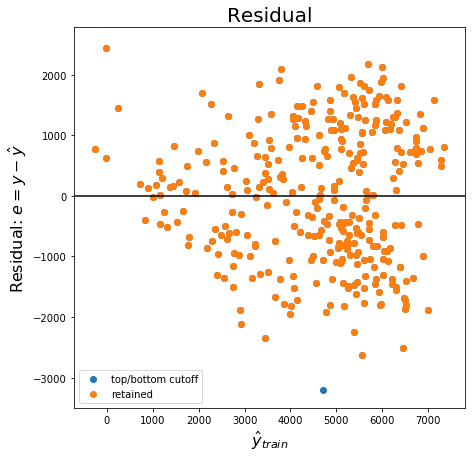

In [37]:
# Residual plot with outliers (|residuals| too large) in blue 
fig3, ax3 = plt.subplots(1, 1, figsize=(7, 7))

ax3.scatter(x=df_resid_train['y_hat'], y=df_resid_train['e'], label='top/bottom cutoff')
ax3.scatter(x=df_resid_train_mid['y_hat'], y=df_resid_train_mid['e'], label='retained')
ax3.axhline(y = 0, color='black', linestyle='-')
ax3.set_title('Residual', fontsize=20)
ax3.set_xlabel('$\hat{y}_{train}$', fontsize=16)
ax3.set_ylabel('Residual: ${e} = y - \hat{y}$', fontsize=16)
ax3.legend()

In [38]:
# refit the model with the mid data
df_train_mid = df_resid_train_mid.drop(['y_hat', 'e'], axis=1)

# features
X_train_poly_mid = add_constant(df_train_mid[predictors_poly]) # do not need to update features for test data

# response variable
y_train_mid = df_train_mid['count']

# fit multiple regression model on the expanded training set
linear_poly_mid = sm.OLS(y_train_mid, X_train_poly_mid).fit()

# predict with regression model
y_hat_train_poly_mid = linear_poly_mid.predict(X_train_poly_mid)
y_hat_test_poly_mid = linear_poly_mid.predict(X_test_poly_ones)

# model performance
r2_train_poly_mid = r2_score(y_train_mid, y_hat_train_poly_mid)
r2_test_poly_mid = r2_score(y_test, y_hat_test_poly_mid)

p_vals_poly_mid = linear_poly_mid.pvalues

print('R-squared for the train set is: %f' %r2_train_poly_mid)
print('R-squared for the test set is: %f' %r2_test_poly_mid)
# print('The coefficients are: \n', linear_poly_mid.params)
# print('--------------------------')
# print('significant p-values: \n', p_vals_poly_mid95[p_vals_poly_mid<0.05])

R-squared for the train set is: 0.677168
R-squared for the test set is: 0.284220


## Answer

Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)?
> ** Yes, this information suggests that at least some data points in the training dataset are outliers and justifies their removal. **

Give a justification for your proposed approach.
> ** Because erroneously labeled data do not follow the true data trend, they are most likely going to be outliers. Therefore, our strategy is to 1) identify outliers by calculating and visualizing residuals, 2) drop the data points that corresponds to the outliers, 3) re-fit on the shrunk training data, 4) verify test $R^2$. Specifically, we defined non-outliers as data points that have residuals that are at least 10% smaller in magnitude than the maximum residual. **

>** Using this approach, we are able to improve test $R^2$.**

> **Baseline**: polynomial model in part (g) test $R^2$ = 0.277238.
> **Our model**: test $R^2$ = 0.284220.

> **Assumptions**: 1) The test set is correctly labeled; 2) An improved $R^2$ indicates more confidence that we have truly identified and removed the outliers.


# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




In [39]:
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from scipy.stats import t
from math import *

# Read beerdata
df_beer = pd.read_csv('data/beerdata.csv', index_col="Unnamed: 0")
df_beer.head()

,x,y
0,0.760083,9.616565
1,0.766794,8.652492
2,0.504173,7.653462
3,0.357411,7.984081
4,0.730932,9.080448


In [40]:
# Error in Normal distribution: u=0, fixed scale
X_beer = sm.add_constant(df_beer['x'])
y_beer = df_beer['y']

# Split train/test data
X_beer_train, X_beer_test, y_beer_train, y_beer_test = train_test_split(X_beer, y_beer, test_size=0.2, random_state=22)

w_normal = np.dot(np.dot(np.linalg.inv(np.dot(X_beer_train.T, X_beer_train)), X_beer_train.T), y_beer_train)
w_normal

array([ 4.76875253,  6.40530897])

In [41]:
# Error in Student-t distribution: degree_freedom=5, u=0, scale=0.5
def t_loss(w):
    X = np.array(X_beer_train) # copy X_beer_train
    y = np.array(y_beer_train) # copy y_beer_train
    n = X.shape[0]
    
    log_likelihood = 0
    for i in range(n):
        v = y[i] - np.dot(X[i], w)
        log_likelihood += log(1 + t.pdf(v, df=5, loc=0, scale=0.5))
    return -log_likelihood # return the minus sum of log likelihood

w_student_init = np.array([
    [3],
    [3]
])
w_student = minimize(t_loss, w_student_init).x
w_student

array([ 5.03040436,  5.72980069])

In [42]:
y_hat_normal_test = np.dot(X_beer_test, w_normal)
y_hat_student_test = np.dot(X_beer_test, w_student)

r2_normal_test = r2_score(y_beer_test, y_hat_normal_test)
r2_student_test = r2_score(y_beer_test, y_hat_student_test)

print('r2_normal_test: %f' % r2_normal_test)
print('r2_student_test: %f' % r2_student_test)

r2_normal_test: 0.683831
r2_student_test: 0.745844


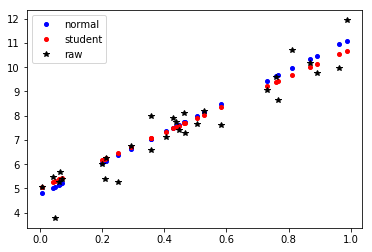

In [43]:
plt.plot(X_beer.x, np.dot(X_beer, w_normal), 'bo', markersize='4', label='normal')
plt.plot(X_beer.x, np.dot(X_beer, w_student), 'ro', markersize='4', label='student')
plt.plot(X_beer.x, y_beer, 'k*', label='raw')
plt.legend()

## Answer 1

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal?

> **Comparing the test $R^2$ of both models, the model assuming noise $\sim$ Student-t distribution performs better. **

> `r2_normal_test: 0.683831`

> `r2_student_test: 0.745844`


> ** The model performances based on the test $R^2$ suggest that the residuals are better characterized by a t-distribution rather than a normal distribution. While both distributions have the noise centered at 0, the observed noise has more spread, which is modeled better by a t-distribution. **

## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  

### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [44]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

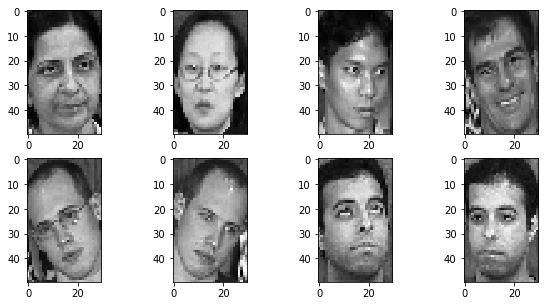

In [46]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()

# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()

In [47]:
def image_column_concate(M):
    m, n = M.shape
    long = np.zeros((m*n,))
    for j in range(n):
        long[j*m:(j+1)*m] = M[:,j]
    return long

def de_image_column_concate(V, m, n): # V.shape[0] = m*n
    M = np.zeros((m,n)) 
    for j in range(n):
        M[:,j] = V[j*m:(j+1)*m]
    return M

In [48]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])

A_long = image_column_concate(A)
print(A_long)
B = de_image_column_concate(A_long, 4, 3)
print(B)

[  1.   4.   7.  10.   2.   5.   8.  11.   3.   6.   9.  12.]
[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]


In [49]:
N = 50 # number of classes
p = 12 # each class has 12 training images
q = 50*30 # 1d length of the down-sampled image
X = np.zeros((N, q, p)) # each class has p cols, each col has q pixels
H = np.zeros((N, q, q)) # each class has q by q Hi

for i in range(N):
    class_i_images = train_dataset[train_labels == i]
    pi = class_i_images.shape[0] # pi = 12
    Xi = np.zeros((q, pi))
    for j in range(pi):
        image_long = image_column_concate(class_i_images[j])
        Xi[:,j] = image_long/np.max(image_long) # normalize so that max pixel value = 1
    X[i] = Xi # Construct Xi for i = 0,1,2,...50

for i in range(N):
    Xi = X[i]
    H[i] = np.dot(np.dot(Xi, np.linalg.inv(np.dot(Xi.T, Xi))), Xi.T) # Construct Hi for i = 0,1,2,...50

In [50]:
def image_predict(image_set): # Return the (L,) results to be compared with labels
    L, m, n = image_set.shape
    label_preds = np.zeros((L,)).astype(np.int8)
    for a in range(L):
        y = image_column_concate(image_set[a]) # no need to normalize y
        y_hats = np.zeros((N, q))
        dis = np.zeros((N,))
        for i in range(N): 
            y_hats[i] = np.dot(H[i], y) # calculate y_hats
            dis[i] = np.linalg.norm(y_hats[i]-y) # record dis(y_hats[i]-y)
        label_preds[a] = np.argmin(dis) # classification decision made to be the y_hats[i] closest to y
    return label_preds

def accuracy(label_true, label_preds): # Compute the prediction accuracy
    correct_count = np.count_nonzero(label_true==label_preds)
    total = label_true.shape[0]
    return correct_count/total

In [51]:
train_preds = image_predict(train_dataset)
acc_train = accuracy(train_labels, train_preds)
test_preds = image_predict(test_dataset)
acc_test = accuracy(test_labels, test_preds)

print('acc_train: %f' % acc_train) # Must be 1.00 since training images form the column spaces (exists i: dis[i]==0)
print('acc_test: %f' % acc_test)

acc_train: 1.000000
acc_test: 0.813333


In [52]:
# Get the indices of correct/wrong classifications
test_indices = np.array(range(len(test_labels)))
wrong_indices = test_indices[test_labels != test_preds]
correct_indices = test_indices[test_labels == test_preds]

print(wrong_indices)
print(correct_indices)

[  1   4   5  37  42  45  55  63  68  70  73  77  80  83  89  94  98 100
 117 118 124 127 131 134 135 140 145 149]
[  0   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  40  41  43  44  46  47  48  49  50  51  52  53  54  56  57  58  59  60
  61  62  64  65  66  67  69  71  72  74  75  76  78  79  81  82  84  85
  86  87  88  90  91  92  93  95  96  97  99 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 119 120 121 122 123 125 126 128 129
 130 132 133 136 137 138 139 141 142 143 144 146 147 148]


In [53]:
should_be_class = test_labels[wrong_indices[0]]
predict_class = test_preds[wrong_indices[0]]

print('should be class: ', should_be_class)
print('predicted class: ', predict_class)

should be class:  0
predicted class:  34


In [54]:
is_class = test_labels[correct_indices[0]]
correct_pred_class = test_preds[correct_indices[0]]

print('should be class: ', is_class)
print('predicted class: ', correct_pred_class)

should be class:  25
predicted class:  25


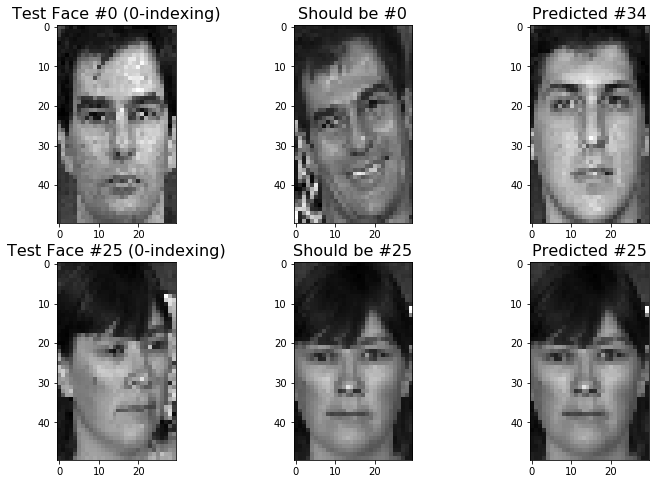

In [55]:
fig, axes = plt.subplots(2,3,figsize=(12,8))

should_be_class = test_labels[wrong_indices[0]]
should_be_faces = train_dataset[train_labels == should_be_class] # 12 training images in the known class

axes[0,0].imshow(test_dataset[wrong_indices[0]], cmap='gray') 
axes[0,0].set_title('Test Face #%d (0-indexing)'% should_be_class, fontsize=16)
axes[0,1].imshow(should_be_faces[0], cmap='gray') # show the first known faces
axes[0,1].set_title('Should be #%d'% should_be_class, fontsize=16)

pred_class = test_preds[wrong_indices[0]]
pred_faces = train_dataset[train_labels == pred_class]
axes[0,2].imshow(pred_faces[0], cmap='gray')
axes[0,2].set_title('Predicted #%d'% pred_class, fontsize=16)


is_class = test_labels[correct_indices[0]]
is_faces = train_dataset[train_labels == is_class] # 12 training images in the known class

axes[1,0].imshow(test_dataset[correct_indices[0]], cmap='gray') 
axes[1,0].set_title('Test Face #%d (0-indexing)'% is_class, fontsize=16)
axes[1,1].imshow(is_faces[0], cmap='gray') # show the first known faces
axes[1,1].set_title('Should be #%d'% is_class, fontsize=16)

correct_pred_class = test_preds[correct_indices[0]] 
correct_pred_faces = train_dataset[train_labels == correct_pred_class] # same as 'Should be' since this correct classification
axes[1,2].imshow(correct_pred_faces[0], cmap='gray')
axes[1,2].set_title('Predicted #%d'% correct_pred_class, fontsize=16)


In [56]:
correct_index = correct_indices[2]
correct_class = test_labels[correct_index]
y_correct_face = image_column_concate(test_dataset[correct_index]) 

model = sm.OLS(y_correct_face, sm.add_constant(X[correct_class]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 11 Oct 2017   Prob (F-statistic):          2.35e-299
Time:                        09:43:10   Log-Likelihood:                -7093.7
No. Observations:                1500   AIC:                         1.421e+04
Df Residuals:                    1487   BIC:                         1.428e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6893      2.413      3.187      0.0

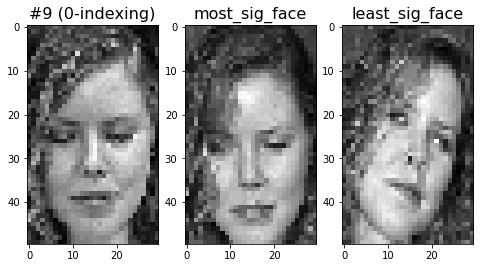

In [57]:
face = test_dataset[correct_index]

most_sig_col = X[correct_class, :, np.argmin(results.pvalues)-1]
least_sig_col = X[correct_class, :, np.argmax(results.pvalues)-1]

most_sig_image = de_image_column_concate(most_sig_col, 50, 30)
least_sig_image = de_image_column_concate(least_sig_col, 50, 30)

fig, axes = plt.subplots(1,3,figsize=(8,5))
axes[0].imshow(face, cmap='gray')
axes[0].set_title('#%d (0-indexing)' % correct_class, fontsize=16)

axes[1].imshow(most_sig_image, cmap='gray')
axes[1].set_title('most_sig_face', fontsize=16)

axes[2].imshow(least_sig_image, cmap='gray')
axes[2].set_title('least_sig_face', fontsize=16)

plt.show()

## Answer 2

> **Train accuracy:**

> - `acc_train: 1.000000` 
> - must be 1.00 since training images form the column spaces 
> - $\exists$ i $\in$ {0,1,2,...,49} such that `dis[i] == 0`

> **Test accuracy:** 

> - `acc_test: 0.813333`


> The ** most significant face**  has a similar facing direction as the testing image (for here, both facing straight forward), making highest contribution for a correct prediction.

> The ** least significant face**  is facing a different direction, providing little useful information for a correct prediction.